HW1


In [1]:
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 3.4 MB/s eta 0:00:00


In [2]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

In [3]:
n_states = 3
cov = 0.0001
transmat = np.full((n_states, n_states), 1/n_states)
startprob = np.full(n_states, 1/n_states)

# Create a Gaussian HMM
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag")
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = np.array([[i] for i in range(n_states)])  # Means for each state
model.covars_ = np.array([[cov]] * n_states)  # Unit variance
obs, states = model.sample(10000)
# print('obs',obs)
# print('states',states)

In [4]:
def generate_hmm_data(n_states, n_samples, noise_variance):
    # Transition probability matrix and initial state probability
    transmat = np.full((n_states, n_states), 1/n_states)
    transmat = np.array([[.1,.4,.5],[.2,.6,.2],[.4,.3,.3]])
    # startprob = np.full(n_states, 1/n_states)
    startprob = np.array([.2,.7,.1])

    # Create a Gaussian HMM
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag")
    model.startprob_ = startprob
    model.transmat_ = transmat
    model.means_ = np.array([[i] for i in range(n_states)])  # Means for each state
    model.covars_ = np.array([[noise_variance]] * n_states)  # Unit variance

    # Generate samples
    observations, states = model.sample(n_samples)

    # # Add noise
    # observations = states + np.random.normal(0, np.sqrt(noise_variance), size=(n_samples, 1))

    return states, observations, model

def hmm_filter_smoother(observations, model):
    # Filter (Forward Algorithm)
    logprob, posteriors = model.score_samples(observations)
    estimated_states_filter = np.argmax(posteriors, axis=1)

    # Smoother (Backward Algorithm)
    estimated_states_smoother = model.decode(observations, algorithm='viterbi')[1]

    return estimated_states_filter, estimated_states_smoother

def compute_mse(true_states, estimated_states):
    return np.mean((true_states.squeeze() - estimated_states) ** 2)



In [179]:
## Problem 1
# Parameters
n_states = 3
n_samples = 1000
noise_variances = [.001, 0.01, .1, 1, 5]  # Different noise variances

# Results storage
results = []

# Simulation
for noise_variance in noise_variances:
    true_states, observations, model = generate_hmm_data(n_states, n_samples, noise_variance)
    estimated_states_filter, estimated_states_smoother = hmm_filter_smoother(observations, model)
    mse_filter = compute_mse(true_states, estimated_states_filter)
    mse_smoother = compute_mse(true_states, estimated_states_smoother)
    results.append((noise_variance, mse_filter, mse_smoother))

results

[(0.001, 0.0, 0.0),
 (0.01, 0.0, 0.0),
 (0.1, 0.077, 0.073),
 (1, 0.449, 0.468),
 (5, 0.561, 0.553)]

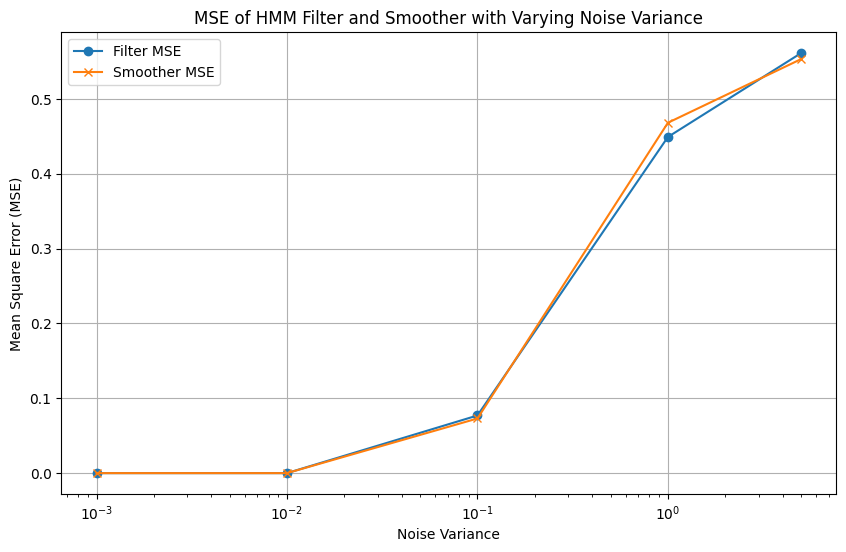

In [180]:
# Extracting noise variances, MSE for filter and smoother
noise_variances = [item[0] for item in results]
mse_filter = [item[1] for item in results]
mse_smoother = [item[2] for item in results]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(noise_variances, mse_filter, label='Filter MSE', marker='o')
plt.plot(noise_variances, mse_smoother, label='Smoother MSE', marker='x')
plt.xlabel('Noise Variance')
plt.ylabel('Mean Square Error (MSE)')
plt.title('MSE of HMM Filter and Smoother with Varying Noise Variance')
plt.xscale('log')  # Since noise variance varies exponentially
plt.legend()
plt.grid(True)
plt.show()

In [213]:
## Problem 2
n_states = 3
covs = [0.005, 0.008, 0.015, 0.03]
transmat = np.full((n_states, n_states), 1/n_states)
startprob = np.full(n_states, 1/n_states)

# Create a Gaussian HMM
logprobs = []
for cov in covs:
    model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag")
    model.startprob_ = startprob
    model.transmat_ = transmat
    model.means_ = np.array([[i] for i in range(n_states)])  # Means for each state
    model.covars_ = np.array([[cov]] * n_states)  # Unit variance
    obs, states = model.sample(50)
    logprob, posteriors = model.score_samples(obs)
    print('logprob',logprob)
    logprobs.append(logprob)
    # print('prob',np.exp(logprob))

logprob 9.731759695039187
logprob -6.19619188226549
logprob -26.473471171813085
logprob -35.171111029937705


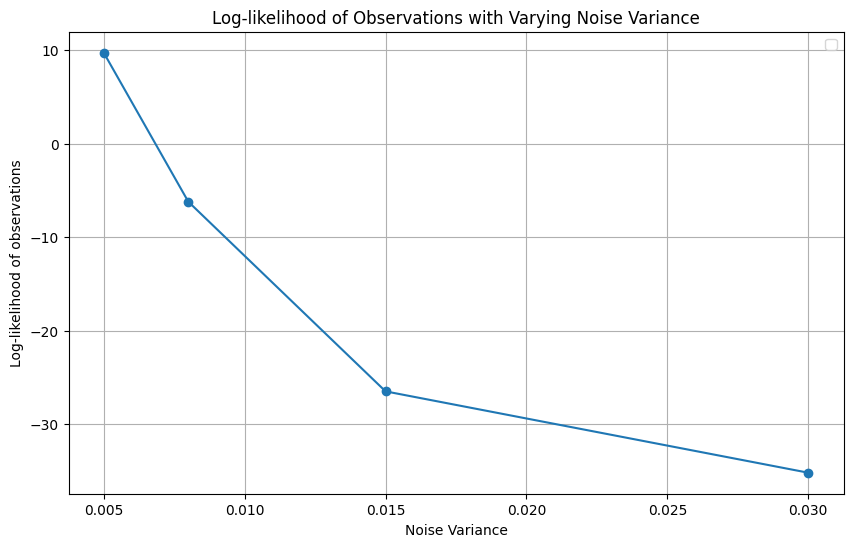

In [214]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(covs, logprobs, marker='o')
plt.xlabel('Noise Variance')
plt.ylabel('Log-likelihood of observations')
plt.title('Log-likelihood of Observations with Varying Noise Variance')
# plt.xscale('log')  # Since noise variance varies exponentially
plt.legend()
plt.grid(True)
plt.show()

In [12]:
## Problem 3
n_states = 3
transmat = np.array([[.1,.4,.5],[.2,.6,.2],[.4,.3,.3]])
startprob = np.array([.2,.7,.1])

# Create a Gaussian HMM
logprobs = []
model = hmm.GaussianHMM(n_components=n_states, covariance_type="diag")
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = np.array([[i] for i in range(n_states)])  # Means for each state
model.covars_ = np.array([[1e-1]] * n_states)  # Unit variance
obs, states = model.sample(500)
model.fit(obs)
model.transmat_

array([[0.18329838, 0.30496921, 0.51173241],
       [0.22972532, 0.76376919, 0.00650549],
       [0.70410994, 0.074006  , 0.22188406]])

In [234]:
model.covars_

array([[[0.33278816]],

       [[0.47769108]],

       [[0.26886399]]])

HW4


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = 0.5
sigma_w = 0.1
sigma_v = 0.1
num_particles = 1000  # Number of particles
num_grid_points = 1000  # Number of grid points for quantization
time_steps = 100

In [ ]:
def state_update(x, a, sigma_w):
    return a * x + np.random.normal(0, sigma_w)

def observation(x, sigma_v):
    return np.arctan(x) + np.random.normal(0, sigma_v)

def particle_filter_update(particles, weights, y, a, sigma_w, sigma_v):
    # Predict
    particles = state_update(particles, a, sigma_w)

    # Update
    predicted_observation = np.arctan(particles)
    weights *= np.exp(-0.5 * ((predicted_observation - y) / sigma_v)**2)
    weights += 1.e-300
    weights /= np.sum(weights)

    # Resample
    indices = np.random.choice(range(num_particles), size=num_particles, p=weights)
    particles = particles[indices]
    weights = np.ones(num_particles) / num_particles
    return particles, weights

In [ ]:
def grid_quantization(y, grid, a, sigma_w, sigma_v):
    # Update grid probabilities
    new_grid = np.zeros_like(grid)
    for i in range(num_grid_points):
        # Propagate each grid point through state update
        x_propagated = a * grid[i]
        # Calculate weight based on observation
        weight = np.exp(-0.5 * ((np.arctan(x_propagated) - y) / sigma_v)**2)
        new_grid[i] = weight * grid[i]

    new_grid /= np.sum(new_grid)
    return new_grid

In [ ]:
# Initialize particles and weights
particles = np.random.normal(0, sigma_w, num_particles)
weights = np.ones(num_particles) / num_particles

# Initialize grid for quantization
grid = np.linspace(-2, 2, num_grid_points)
grid_probabilities = np.ones(num_grid_points) / num_grid_points

# True state and observations
true_state = np.zeros(time_steps)
observations = np.zeros(time_steps)

# MSE tracking
mse_particle_filter = np.zeros(time_steps)
mse_grid_quantization = np.zeros(time_steps)

# Simulation
for k in range(time_steps):
    true_state[k] = state_update(true_state[k-1], a, sigma_w) if k > 0 else 0
    observations[k] = observation(true_state[k], sigma_v)

    # Particle Filter
    particles, weights = particle_filter_update(particles, weights, observations[k], a, sigma_w, sigma_v)
    estimated_state_pf = np.sum(particles * weights)
    mse_particle_filter[k] = (true_state[k] - estimated_state_pf)**2

    # Grid Quantization
    grid_probabilities = grid_quantization(observations[k], grid, a, sigma_w, sigma_v)
    estimated_state_gq = np.sum(grid * grid_probabilities)
    mse_grid_quantization[k] = (true_state[k] - estimated_state_gq)**2



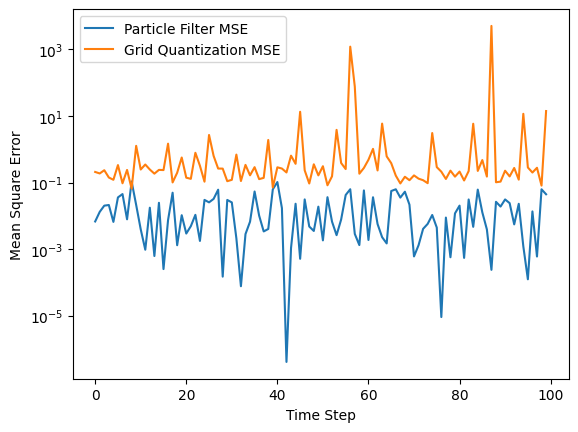

In [ ]:
# Plot MSE
# plt.semilogy(x, y)
plt.semilogy(mse_particle_filter, label='Particle Filter MSE')
plt.semilogy(mse_grid_quantization, label='Grid Quantization MSE')
plt.xlabel('Time Step')
plt.ylabel('Mean Square Error')
plt.legend()
# plt.show()
plt.savefig('hw4.png', dpi=300)